In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
n_submit_images = pd.read_csv("../Proj/sample_submission_v2.csv").shape[0]
print(f"Images for submission: {n_submit_images}")

pd.read_csv(f"../Proj/train_ship_segmentations_v2.csv").head()

Images for submission: 15606


,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,0001124c7.jpg,NaN
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...


In [18]:
def load_df(file="train"):
    """
    Loads a csv, creates the fields `HasShip` and `TotalShips` dropping `EncodedPixels` and setting `ImageId` as index.
    """
    df = pd.read_csv(f"../Proj/{file}_ship_segmentations_v2.csv")
    df['HasShip'] = df['EncodedPixels'].notnull()
    df = df.groupby("ImageId").agg({'HasShip': ['first', 'sum']}) # counts amount of ships per image, sets ImageId to index
    df.columns = ['HasShip', 'TotalShips']
    return df

def show_df(df):
    """
    Prints and displays the ship/no-ship ratio and the ship count distribution of df
    """
    total = len(df)
    ship = df['HasShip'].sum()
    no_ship = total - ship
    total_ships = int(df['TotalShips'].sum())
        
    print(f"Images: {total} \nShips:  {total_ships}")
    print(f"Images with ships:    {round(ship/total,2)} ({ship})")
    print(f"Images with no ships: {round(no_ship/total,2)} ({no_ship})")
    
    _, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 8), gridspec_kw = {'width_ratios':[1, 3]})
    
    # Plot ship/no-ship with a bar plot
    ship_ratio = df['HasShip'].value_counts() / total
    ship_ratio = ship_ratio.rename(index={True: 'Ship', False: 'No Ship'})
    ship_ratio.plot.bar(ax=axes[0], color=['red', 'lime'], rot=0, title="Ship/No-ship distribution");
    
    # Plot TotalShips distribution with a bar plot
    total_ships_distribution = df.loc[df['HasShip'], 'TotalShips'].value_counts().sort_index() / ship
    total_ships_distribution.plot(kind='bar', ax=axes[1], rot=0, color=['blue', 'red', 'green', 'purple', 'cyan','gray','pink','orange','olive','black','lightblue'],title="Total ships distribution")
    plt.show()

Images: 192556 
Ships:  81723
Images with ships:    0.22 (42556)
Images with no ships: 0.78 (150000)


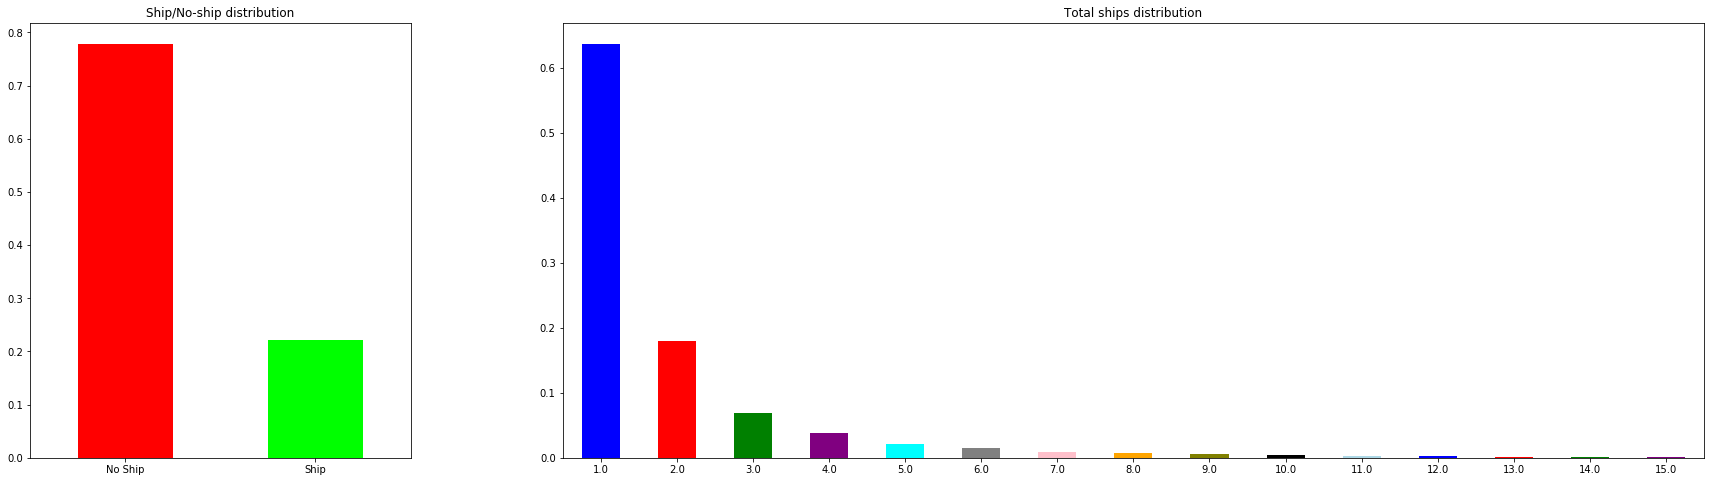

In [19]:
df_train = load_df("train")
show_df(df_train)

In [ ]:
# ref: https://www.kaggle.com/julian3833/3-basic-exploratory-analysis